In [79]:
%load_ext autoreload
%autoreload 2

import gc
import os
import pandas as pd
import numpy as np
import re
import math
from collections import defaultdict

from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
os.chdir("T:\\laupodteam\\AIOS\\Bram\\notebooks\\code_dev\\negation-detection")

In [83]:
DCC = pd.read_csv("data/EMCDutchClinicalCorpus/all.csv", sep=";", encoding='latin1', engine='c')
DCC.columns = ['name', 'text']
DCC['group'] = DCC.name.str[:2]
DCC['num_words'] = DCC.text.apply(lambda x: len(x.split()))
DCC['num_unique_words'] = DCC.text.apply(lambda x: len(set(x.split())))
DCC['num_sentences'] = DCC.text.apply(lambda x: len(x.split(".")))
DCC['num_words_per_sentence'] = DCC.num_words / DCC.num_sentences
DCC['num_unique_words_per_sentence'] = DCC.num_unique_words / DCC.num_sentences
DCC['num_words_per_unique_word'] = DCC.num_words / DCC.num_unique_words

Text(0.5, 0, 'Number of words')

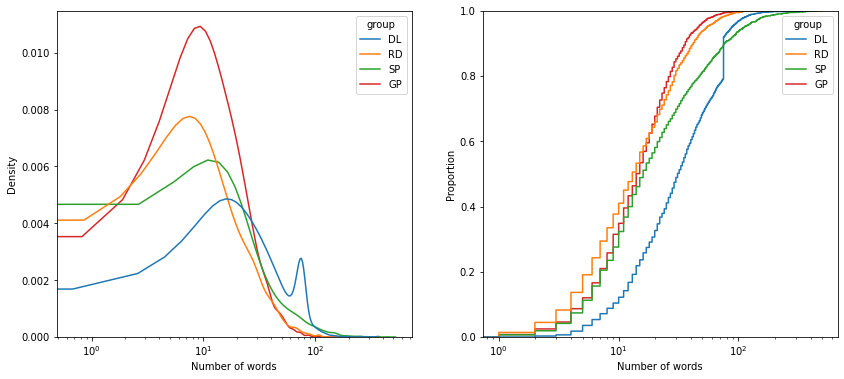

In [78]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))
sns.kdeplot(data=DCC, x='num_words', hue='group', ax=ax[0])
ax[0].semilogx()
ax[0].set_xlabel('Number of words')

sns.ecdfplot(DCC, x='num_words', hue='group', ax = ax[1])
ax[1].semilogx()
ax[1].set_xlabel('Number of words')


Text(0.5, 0, 'Number of unique words')

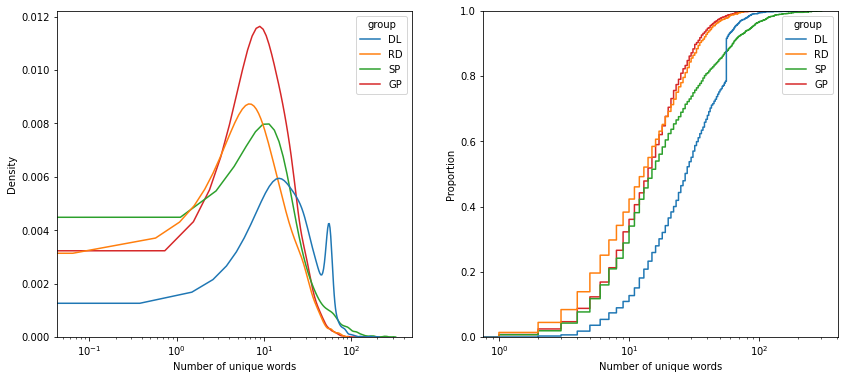

In [82]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))
sns.kdeplot(data=DCC, x='num_unique_words', hue='group', ax=ax[0])
ax[0].semilogx()
ax[0].set_xlabel('Number of unique words')

sns.ecdfplot(DCC, x='num_unique_words', hue='group', ax = ax[1])
ax[1].semilogx()
ax[1].set_xlabel('Number of unique words')


Text(0.5, 0, 'Number of words per sentence')

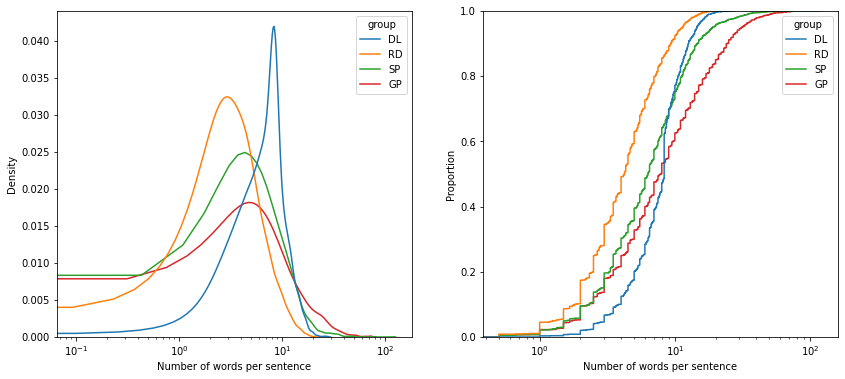

In [88]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))
sns.kdeplot(data=DCC, x='num_words_per_sentence', hue='group', ax=ax[0])
ax[0].semilogx()
ax[0].set_xlabel('Number of words per sentence')

sns.ecdfplot(DCC, x='num_words_per_sentence', hue='group', ax = ax[1])
ax[1].semilogx()
ax[1].set_xlabel('Number of words per sentence')

Text(0.5, 0, 'Number of words per sentence')

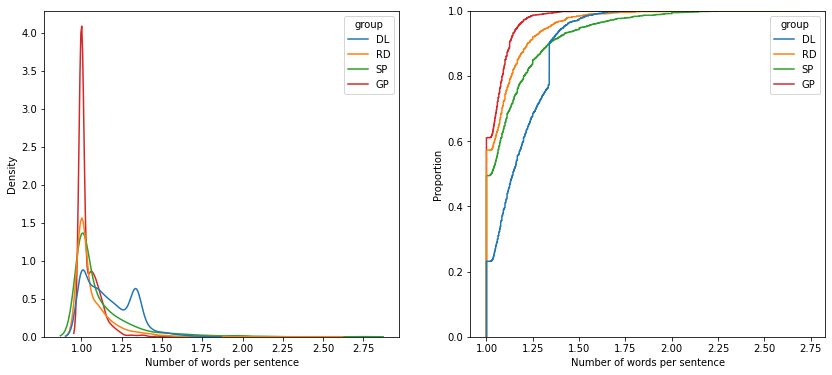

In [94]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))
sns.kdeplot(data=DCC, x='num_words_per_unique_word', hue='group', ax=ax[0])
ax[0].set_xlabel('Number of words per sentence')

sns.ecdfplot(DCC, x='num_words_per_unique_word', hue='group', ax = ax[1])
ax[1].set_xlabel('Number of words per sentence')